In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import timedelta
plt.style.use('seaborn')
import seaborn as sns
%matplotlib inline
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.max_rows', 500)


# Analysis of Cycling Data

## Loading Data

The first dataset is an export of an individual's ride data from [Strava](https://strava.com/), an online social 
network site for cycling and other sports.  This data is a log of every ride since the start of 2018
and contains summary data like the distance and average speed.  It was exported using 
the script `scripts/stravaget.py` which uses the stravalib module to read data. Some details of
the fields exported by that script can be seen in [the documentation for stravalib](https://pythonhosted.org/stravalib/api.html#stravalib.model.Activity). 

The exported data is a CSV file so that's easy to read, however the date information in the file is 
recorded in a different timezone (UTC) so we need to do a bit of conversion. In reading the data we
set the index of the data frame to be the datetime of the ride. 

In [2]:
strava = pd.read_csv('data/strava_export.csv', index_col='date', parse_dates=True)
strava.head()

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type
date,,,,,,,,,,
2018-01-02 20:47:51+00:00,100.6,21.0,73.8,False,15.2,94,316.00 m,10,73,Ride
2018-01-04 01:36:53+00:00,NaN,24.0,131.7,False,18.0,52,236.00 m,5,46,Ride
2018-01-04 02:56:00+00:00,83.1,25.0,13.8,False,0.0,3,0.00 m,2,2,Ride
2018-01-04 05:37:04+00:00,110.1,24.0,113.6,False,22.9,77,246.00 m,8,64,Ride
2018-01-05 19:22:46+00:00,110.9,20.0,147.7,True,58.4,189,676.00 m,12,144,Ride


The second dataset comes from an application called [GoldenCheetah](https://www.goldencheetah.org/) which provides
some analytics services over ride data.  This has some of the same fields but adds a lot of analysis of the 
power, speed and heart rate data in each ride.  This data overlaps with the Strava data but doesn't include all 
of the same rides. 

Again we create an index using the datetime for each ride, this time combining two columns in the data (date and time) 
and localising to Sydney so that the times match those for the Strava data. 

In [3]:
cheetah = pd.read_csv('data/cheetah.csv', skipinitialspace=True)
cheetah.index = pd.to_datetime(cheetah['date'] + ' ' + cheetah['time'])
cheetah.index = cheetah.index.tz_localize('Australia/Sydney')
cheetah.head()

,date,time,filename,axPower,aPower Relative Intensity,aBikeScore,Skiba aVI,aPower Response Index,aIsoPower,aIF,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-28 06:39:49+11:00,01/28/18,06:39:49,2018_01_28_06_39_49.json,202.211,0.75452,16.6520,1.31920,1.67755,223.621,0.83441,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-28 07:01:32+11:00,01/28/18,07:01:32,2018_01_28_07_01_32.json,226.039,0.84343,80.2669,1.21137,1.54250,246.185,0.91860,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-02-01 08:13:34+11:00,02/01/18,08:13:34,2018_02_01_08_13_34.json,0.000,0.00000,0.0000,0.00000,0.00000,0.000,0.00000,...,0,0,0,0,0,0,0,0.000,0.00000,0.0000
2018-02-06 08:06:42+11:00,02/06/18,08:06:42,2018_02_06_08_06_42.json,221.672,0.82714,78.8866,1.35775,1.86002,254.409,0.94929,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 17:59:05+11:00,02/07/18,17:59:05,2018_02_07_17_59_05.json,218.211,0.81422,159.4590,1.47188,1.74658,233.780,0.87231,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780


The GoldenCheetah data contains many columns. Some are important for our analysis and are defined below. 
Capitalised fields come from the GoldenCheetah data while lowercase_fields come from Strava. There are many cases where fields are duplicated and in this case the values should be the same, although there is room for variation as the algorithm used to calculate them could be different in each case. 

  * Duration - overall duration of the ride, should be same as elapsed_time
  * Time Moving - time spent moving (not resting or waiting at lights), should be the same as moving_time
  * Elevation Gain - metres climbed over the ride
  * Average Speed - over the ride
  * Average Power - average power in watts as measured by a power meter, relates to how much effort is being put in to the ride, should be the same as  * average_watts' from Strava
  * Nonzero Average Power - same as Average Power but excludes times when power is zero from the average
  * Average Heart Rate - should be the same as average_heartrate
  * Average Cadence - cadence is the rotations per minute of the pedals
  * Average Temp - temperature in the environment as measured by the bike computer (should be same as average_temp)
  * VAM - average ascent speed - speed up hills
  * Calories (HR) - Calorie expendature as estimated from heart rate data
  * 1 sec Peak Power - this and other  'Peak Power' measures give the maximum power output in the ride over this time period.  Will be higher for shorter periods. High values in short periods would come from a very 'punchy' ride with sprints for example.
  * 1 min Peak Hr - a similar measure relating to Heart Rate
  * NP - Normalised Power, a smoothed average power measurement, generally higher than Average Power 
  * TSS - Training Stress Score, a measure of how hard a ride this was
  * device_watts - True if the power (watts) measures were from a power meter, False if they were estimated
  * distance - distance travelled in Km
  * kudos - likes from other Strava users (social network)
  * workout_type - one of  'Race',  'Workout' or  'Ride'
  
  
Some of the GoldenCheetah parameters are defined [in thier documentation](https://github.com/GoldenCheetah/GoldenCheetah/wiki/UG_Glossary).  

Now we combine these two data frames using the [`join` method of Pandas]. The goal is to keep only those rows of data 
that appear in __both__ data frames so that we have complete data for every row.  

In [4]:
df = strava.join(cheetah, how ='inner')  #perform join

In the dataframe, we have device_watts column that contains 'False' value for some rows. We now remove the rides where device_watts is false. 

In [5]:
device_watts_false = (df['device_watts'] == False) #select rows where device_watts is false
df.drop(index=df[device_watts_false].index)  #drop rows by index of df['device_watts'] == False

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-27 19:39:49+00:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,0,0,222.856,0.831550,20.2257
2018-01-27 20:01:32+00:00,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,0,0,245.365,0.915540,94.5787
2018-02-05 21:06:42+00:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,0,0,253.702,0.946650,98.3269
2018-02-07 06:59:05+00:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,0,0,232.644,0.868080,171.0780
2018-02-09 19:18:03+00:00,123.0,20.0,145.9,True,59.8,193,656.00 m,22,139,Ride,...,0,0,0,0,0,0,0,212.726,0.793750,147.7970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-19 20:22:49+00:00,NaN,3.0,166.8,True,58.2,174,666.00 m,16,136,Ride,...,0,0,0,0,0,0,0,222.988,0.832045,159.3630
2019-07-26 20:12:56+00:00,120.8,7.0,166.9,True,59.6,185,663.00 m,15,139,Ride,...,0,0,0,0,0,0,0,236.028,0.880701,183.1140
2019-07-27 20:42:59+00:00,122.0,3.0,168.4,True,19.8,49,247.00 m,6,47,Ride,...,0,0,0,0,0,0,0,212.020,0.791118,51.1646
2019-07-27 21:47:24+00:00,144.4,3.0,235.2,True,29.1,50,415.00 m,15,50,Race,...,0,0,0,0,0,0,0,267.699,0.998877,83.5620


### Distribution
We look at the distributions of some key variables: elapsed_time, distance, average speed, average power, TSS.

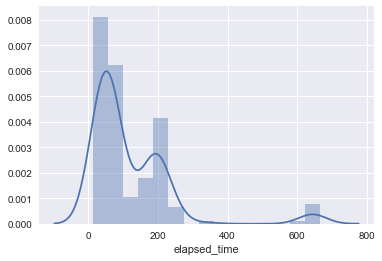

In [6]:
sns.distplot(df['elapsed_time']) #generating distribution plot for elapsed_time
plt.show()

The distribution of elapsed_time variable looks approximately right-skewed. 

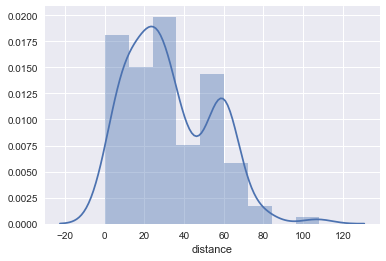

In [7]:
sns.distplot(df['distance']) #distplot for distance
plt.show()

Distribution of distance variable looks right-skewed.

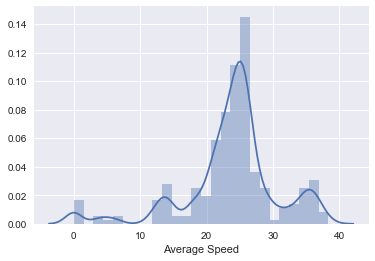

In [8]:
sns.distplot(df['Average Speed']) #distplot Average Speed
plt.show()

From the plot, we see the distribution of Average Speed is almost normal.

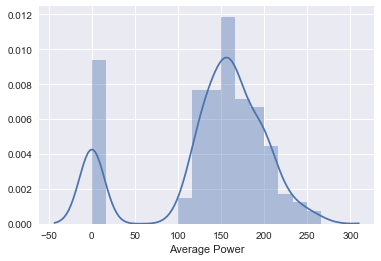

In [9]:
sns.distplot(df['Average Power'])
plt.show()

Average Power variable looks approximately normal but there is one outlier at zero level.

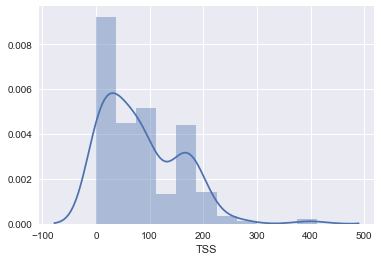

In [10]:
sns.distplot(df['TSS'])
plt.show()

The distribution of TSS is almost right skewed.

### Correlation
We next look at the relationship between key variables such as 'distance', 'moving_time', 'Average Speed', 'average_heartrate', 'Elevation Gain', 'Average Power', 'NP', 'TSS' to find out if they are correlated with eachother.

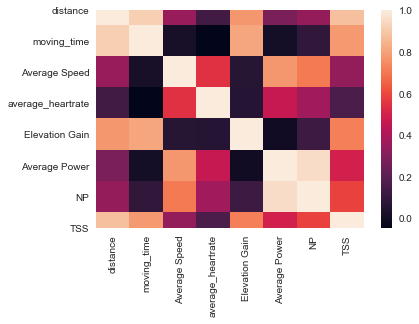

In [11]:
#selecting our variables in a new dataframe
new_df = df[['distance', 'moving_time', 'Average Speed', 'average_heartrate', 'Elevation Gain', 'Average Power', 'NP', 'TSS']]
corr = new_df.corr()
sns.heatmap(corr) #generate heatmap of correlation among the variables
plt.show()

From the heatmap above, we can see some interesting relationship among the variables. Distance have very high positive correlation with moving time whereas it has high positive correlation with Elevation Gain and TSS. It has low positive correlation with Average Speed and NP. Whereas there is negligible correlation with Average Power and average heartrate.

Similarly, Moving time has high positive correlation with Elevation Gain and TSS while it has negligible correlation with average heartrate, Average Speed, Average Power and NP. Average Speed has high positive correlation with Average Power and NP. We see that NP has very high positive correlation with Average Power while it has negligible correlation with moving_time and Elevation Gain. 


### Races vs. Rides
In our dataframe, some of the rides are designated as "Race" in the workout_type field, these are where the cyclist is racing. Normalised Power (NP) is a good measure of how hard a ride is. Now we explore the values of NP for races vs the overall set of rides to see if races more challenging than rides in general.


In [12]:
rides_NP= df[df['workout_type'] == 'Ride']['NP'] #get NP for ride
rides_NP.describe() #summary statistics

count    186.000000
mean     175.584909
std       88.415987
min        0.000000
25%      171.346250
50%      211.344500
75%      227.560500
max      294.308000
Name: NP, dtype: float64

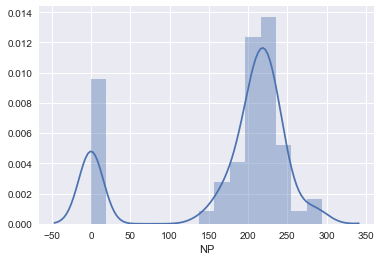

In [13]:
sns.distplot(rides_NP) #checking the distribution of rides_NP
plt.show()

In [14]:
races_NP = df[df['workout_type'] == 'Race']['NP']  #get NP for race
races_NP.describe() #summary statistics


count     30.000000
mean     251.003800
std       50.774197
min        0.000000
25%      244.716250
50%      257.170000
75%      272.654250
max      302.396000
Name: NP, dtype: float64

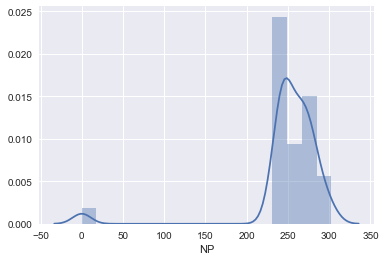

In [15]:
sns.distplot(races_NP) #checking the distribution of races_NP
plt.show()

From the summary of races_NP and rides_NP, we see mean NP for rides is 175 while its 251 for race. Similarly, the maximum values of NP for race and rides are 302 and 294 respectively. We can conclude that races are tougher in general than rides.

### Ride over the year
It is useful to see a summary of rides over the year. We generate a plot that summarises the number of km ridden each month over the period of the data. This distance is overlaid with the sum of the Training Stress Score and the average of the Average Speed to generate an overall summary of activity.


In [16]:
df['date'] = pd.to_datetime(df['date']) #convert date column to pandas datetime format

df['year-month'] = df['date'].apply(lambda x: x.strftime('%Y-%m'))  #create a new column that has year and month of the ride
#df['month_year'] = df['date'].dt.strftime('%B-%Y')

#create a new df that has 'year-month','distance', 'TSS' column. 
new_df1 = df[['year-month','distance', 'TSS']]

#group by year-month and adding distance and TSS for each month.
new_df1 = new_df1.groupby('year-month').sum()

#create a new df that has 'year-month','Average Speed' column.
new_df2 = df[['year-month','Average Speed']]

#group by year-month and computing the average of Average Speed
new_df2 = new_df2.groupby('year-month').mean()

#combining 2 dfs to create a new df that has distance, TSS and Average Speed
df3 = new_df1.join(new_df2)
df3

,distance,TSS,Average Speed
year-month,,,
2018-01,46.2,114.8044,30.230700
2018-02,476.8,1087.2924,23.471867
2018-03,508.0,1381.0867,23.345871
2018-04,450.2,1324.5363,22.974325
2018-05,339.5,718.8654,21.611460
2018-06,193.4,586.4858,27.037100
2018-07,190.0,381.4320,22.065450
2018-08,214.9,370.5251,17.990422
2018-09,204.9,627.2077,23.970480


From the dataframe above, we can say that the highest average speed was for the month of January in 2018 where a total distance of 46.2 was covered.

Now lets sort the dataframe by TSS so that we can clearly see the date with highest and lowest TSS.

In [17]:
sorted_df3_TSS = df3.sort_values(by=['TSS'], ascending=False)
sorted_df3_TSS

,distance,TSS,Average Speed
year-month,,,
2018-11,692.6,1793.3806,25.171586
2019-03,552.0,1611.9748,26.884221
2019-04,640.4,1609.1064,23.602786
2019-05,610.1,1591.1052,26.151856
2018-12,585.1,1498.1566,26.394479
2019-06,522.6,1467.1178,26.003711
2018-03,508.0,1381.0867,23.345871
2018-04,450.2,1324.5363,22.974325
2019-02,494.9,1269.9272,23.938965


We see that the TSS was highest for November of 2018 followed by March 2019 while it was lowest for January 2018.
Similarly, we can also see that the longest distance covered was in the month of November, 2018 while lowest was in January 2018.

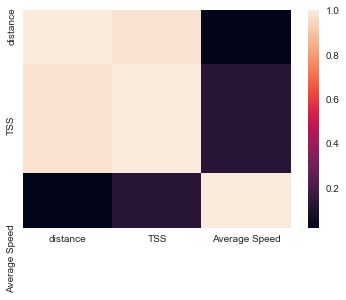

In [19]:
corr = df3.corr()
sns.heatmap(corr)
plt.show()

From the correlation heatmap, we can interpreat that distace has very high positive correlation with TSS while it has negligible correlation with Average Speed. Similarly, TSS has approximately no correlation with Average Speed. 

## Thank You!